## Importing libariries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import plotly as plt
import plotly.express as px

In [24]:
red_wines = pd.read_csv('datasets/winequality-red.csv')

Since we have an already clean dataset, checking for NAs and Duplicates will be sufficient 

In [25]:
#how many duplicates we have
len(red_wines[red_wines.duplicated()])

#dropping ~240 duplicates, and all NAs
red_wines = red_wines.drop_duplicates()
red_wines = red_wines.dropna()

red_wines.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


## Getting some basic statistics

In [26]:
red_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
#to look at quality variable specifically
red_wines.describe().loc[:, "quality"]

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<AxesSubplot: >

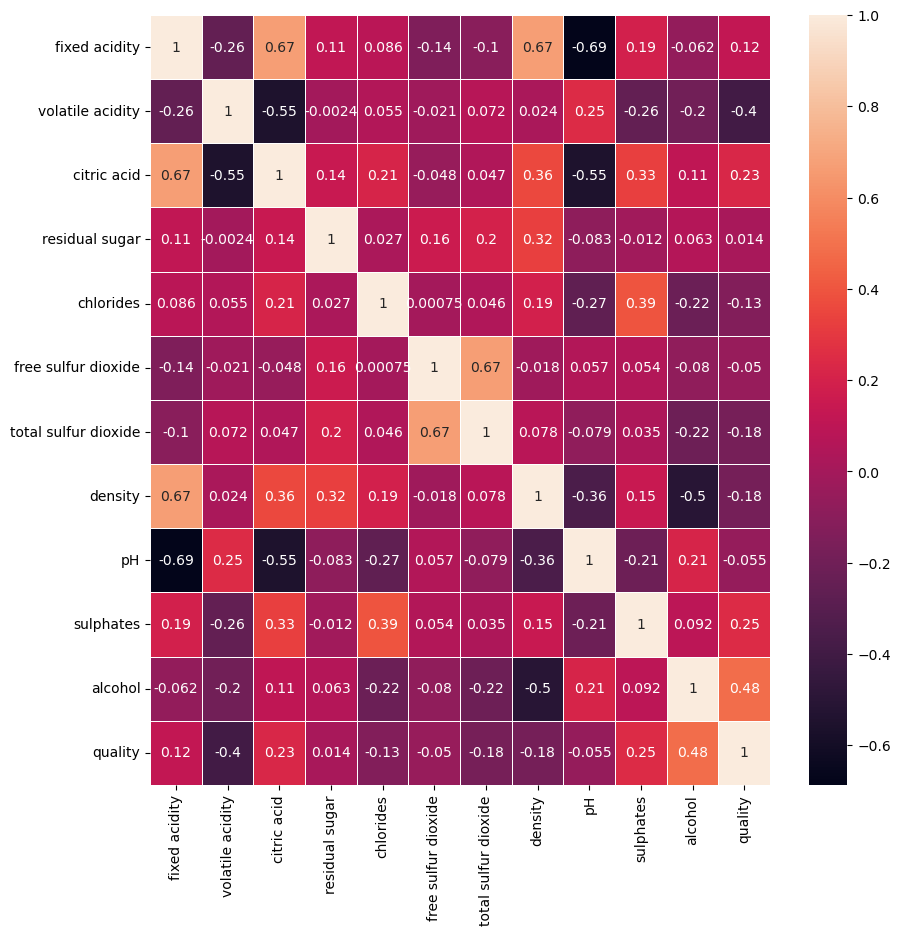

In [31]:
#Correlation matrix
corr_matrix = red_wines.corr()
ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix,annot=True, linewidths=.5)

We can see that correlations between diferent variables are mostly strong. For example, ALCOHOL is strongly associated with DENSITY, PH with FIXED ACIDITY, and CITRIC ACID with VOLATILE ACIDITY. In addition, it is interesting to see which variable are strongly correlated to our dependenat variable Y. It looks like VOLATILE ACIDITY and ALCOHOL have the strongest correlation, followed by CHLORIDES, SULFUR DIOXIDE, SULPATES, and DENSITY. Moreover, we see that the correlation is strong and negative - as there is less CHLORIDES, fo example, the quality rises. It should be kept in mind on the stage of selectiong variables that influence Y variable the most and the least.

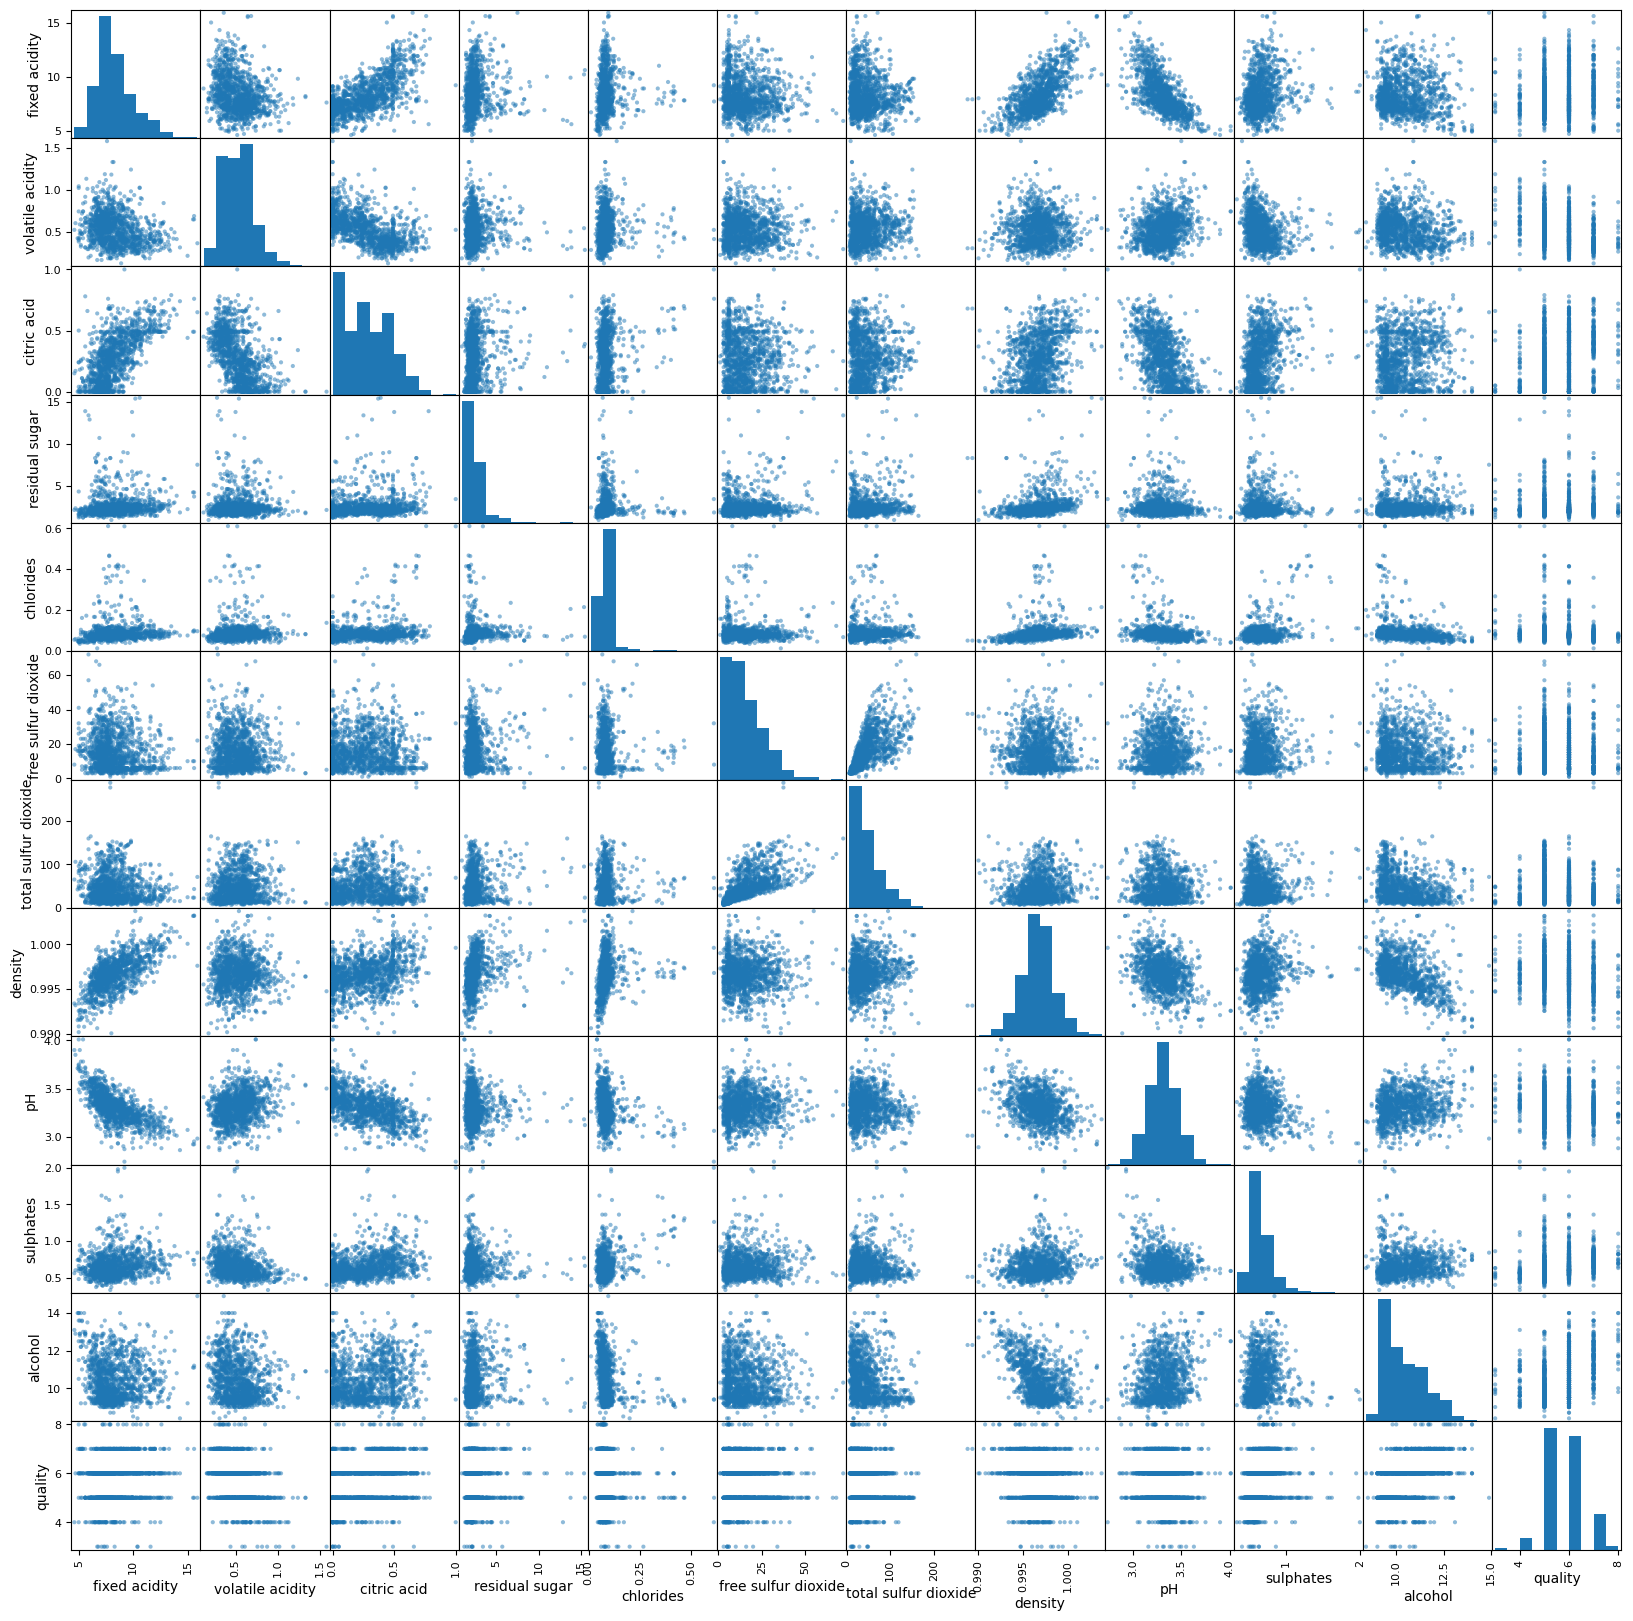

In [32]:
#scatter matrix
pd.plotting.scatter_matrix(red_wines, figsize = (20, 20))
plt.show()

From this scatter matrix we can get an idea of correltion between different variables visually, which gives a slightly different perspective from correlation matrix we have seen before. We can quickly see wich relationships are string and what direction they have. For example, as mentioned before - PH and FIXED ACIDITY have really strong negative correlation. Furthermore, we cn glance at how values for the variables are distributed and we can see that data is mostly skewed right - mean would overestimate the most common values, thus, taking median would give a greaterinsight into the data.

## Boxplots

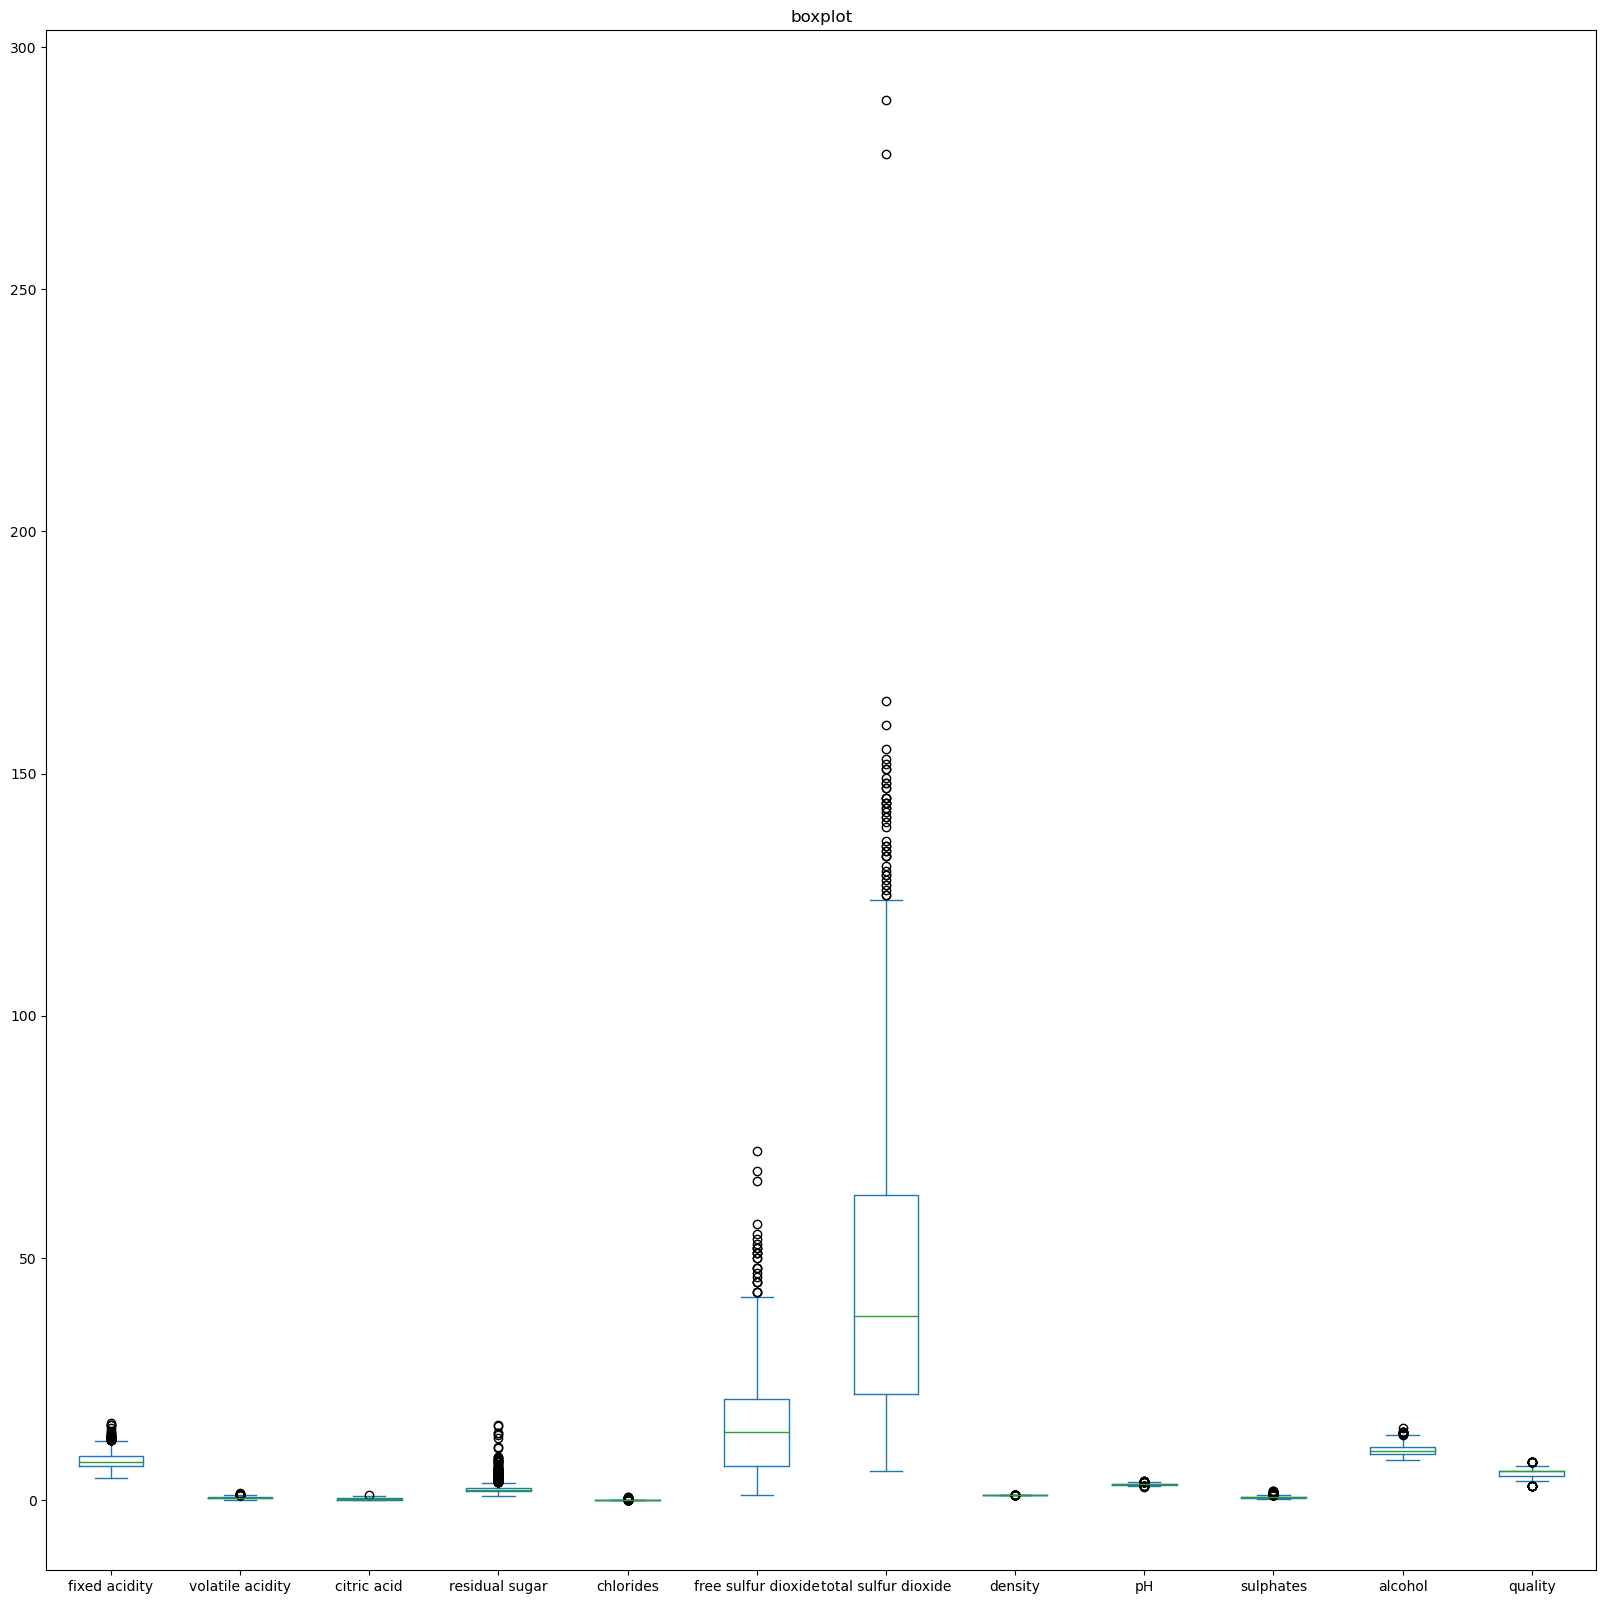

In [33]:
ax = red_wines.plot(kind='box', title='boxplot',figsize = (20, 20))
plt.show()

To look at the nature of data distribution I touch on in the last cell - here are the boxplots. We can see that there are a lot of outliers towards right side - skeweness to the right, supporting our scatter matrix above. Additionally, a valuable insight is that TOTAL SULFUR DIOXIDE, FREE SULFUR DIOXIDE, and RESIDUAL SUGAR have a lot of outliers. This tells us that there are a lot of extreme values for those variables that are significatly different from the rest of the data. This can be an indication that there may be errors or anomalies in the data. Looking at our scatter matrix above we can see that, indeed, these variables are not normally distributed. It could have happened because of many factors - measurement error, natural variation, processing errors, sampling bias, etc. 

Now, we will divide the data into training and testing datasets, and then try to scale and transform data for further analysis.